<a href="https://colab.research.google.com/github/saqib-rgb/ML-With-Pytorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A PyTorch Workflow
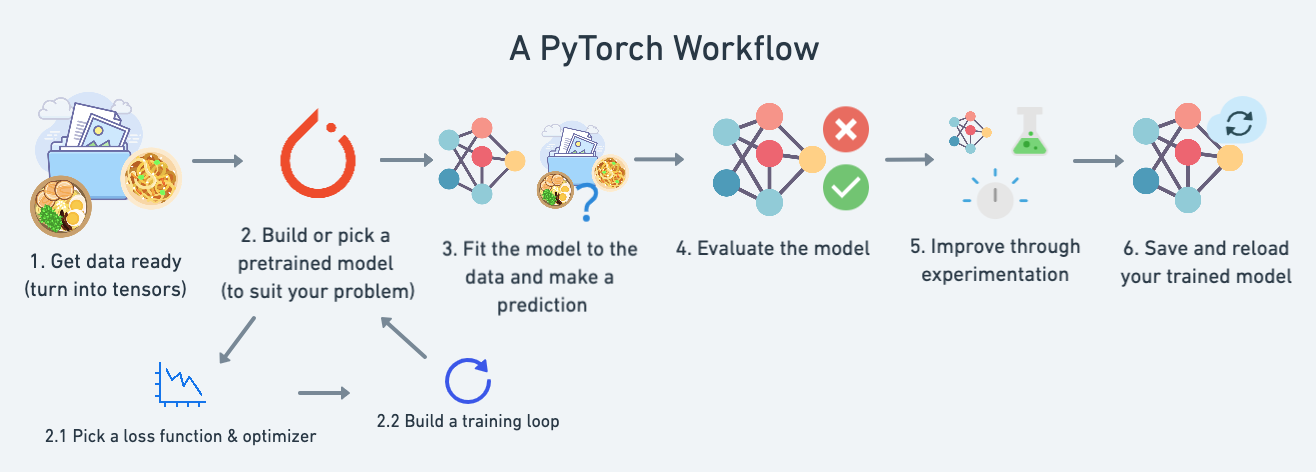
 

# Important Hints:
* Consistency is the key
* Have Confusions: Run the Code
* If you are stuck see the internet: `ChatGpt,Stackoverflow`
* Ask
* Read the documentation

In [1]:
what_were_covering={1:"data(prepare and load)",
                    2:'build model',
                    3:'fitting the model to data(training)',
                    4:'making predictions and evalyating the model(inference)',
                    5:'saving and loading the model',
                    6:'putting it all together'}

what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evalyating the model(inference)',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all the building blocks of PyTorch for Neural Networks
# It also contains all the layers
import matplotlib.pyplot as plt
# Check PyTorch version
torch.__version__

'1.13.1+cu116'

## Data (preparing and loading)
Data can be almost anything....in machine learning.
* Excel Spreadsheet
* Images of any kind
* Videos 
* Audio Like songs or podcasts

Machine learning is a game of two parts:
1. Get data into numerical representation
2. Build a model to learn patterns in numerical representations
 To showcase this, lets create some *known* data using linear regression formuula
 We'll use a linear regression formula to make a straight line with *known* **parameter** 

In [3]:
# create *known* parameters
weight= 0.7
bias=0.3
# Create 
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias #y=a+bX equation of regression line
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), 50, 50)

### Splitting data into training and test sets probably the most importanat concept in machine learning
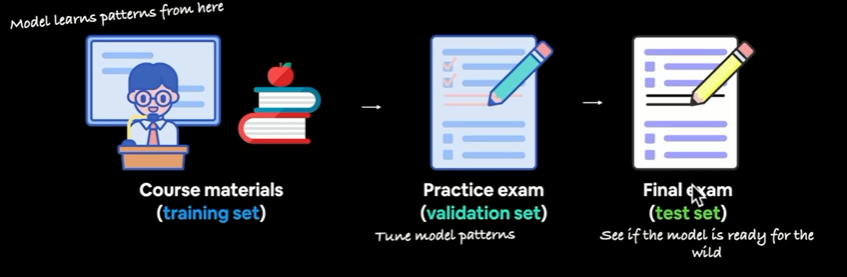

###**Generalization**
The ability of machine learning model to perform well on data it hasnot seen before

In [4]:
# create a train/tets spli
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test) 

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,train_labels=y_train,
                     test_data=X_test,test_labels=y_test,
                     predictions=None):
  """
  plots tarining data,test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4,label='Training data')
  
  plt.scatter(test_data,test_labels, c='g',s=4,label='Testing data')
  
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  # Show the legends
  plt.legend(prop={'size':14});

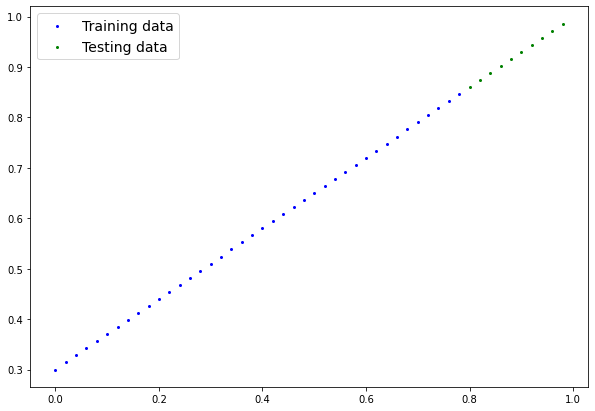

In [6]:
plot_predictions();

## 2. Build model
Our first PyTorch model
What our model does:
* start out with random values(weight&b ias)
* look at training data and adjust random values to be what would represent our data through two main algorithms
 1. Gradient Desent
 2. Back Propogation

In [26]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):#<- almost everything in PyTorch inherits from nn.module
     def __init__(self):
       super().__init__()
       self.weights=nn.Parameter(torch.randn(1,#start with random bias and adjust to get the ideal bias
                                             requires_grad=True,# can this parameter be updated usin gradient desecent?
                                             dtype=torch.float))#PyTorch default
       self.bias=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
       # Forward method to define the computation in the model
     def forward(self, x:torch.Tensor) ->torch.Tensor:#<-'x' is the input data
       return self.weights*x+self.bias # this is the linear regression formula



### PyTorch model building essentials
* torch.nn-contains all the building blocks for compuattaional graphs(neural networks)
* torch.nn.parameter-what parameters our model should try and learn,often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module-base class for all neural networkds module,if you subclass you should overwrite forward()
* torch.optim- this is where the opyimisers in PyTorch live, they will help with gradient descent
* def forward()- All nn.Module subclasses requires you yo overwrite forward(), this method defines what happen in the forward computation

### checking the contents of our PyTorch model
Let us see what is inside
So we can check out about our model using .parameters()

In [27]:
# create a random seed
torch.manual_seed(42)
# Create an instance of the model(this is subclass of nn.Module)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using `torch.inference_mode()`
To check our model predictive power, lets see how well it predicts y_test from X_test
whwn wee pass data throgh our model, it is going to run it throgh the forward() method

In [30]:
# Make prediction with model (One must remember that if an error occurs over here it is due to spacing of the forward method define in the method above)
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds
# Implementation error can occur if indentation(spaces)are not placed properly,especially if the indentation in the forward method is not done properly


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

* If you see in the above cell we have used the `inference mode`, the reason we have done is taht it helps make the predictions faster without keeping track of all the data behind the scenes
* In older code versions you might see many developers have used `with torch.no_grad()` , it pretty much does the same thing bit still context manager as inference mode is much faster in case you have very complex and large data  

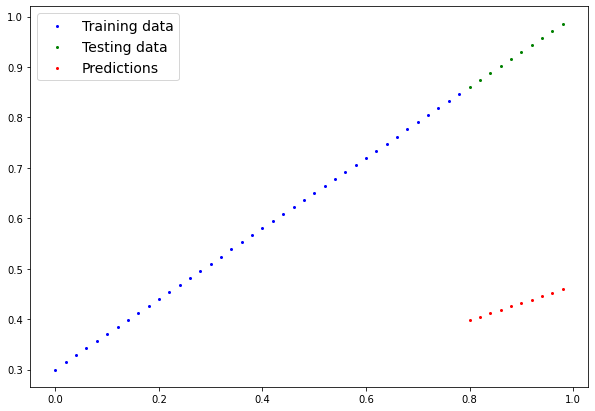

In [32]:
# let us see our predictions without the model being trained based on random values chosen by PyTorch
plot_predictions(predictions=y_preds)

 ## 3. Training our model
 The whole idea is that the model moves from unknown parameters to some known parameters or some poor representation to a good representtaion of the test_data

* One way to measure how poor or how wrong your model predictions are you shuld use PyTorch loss functions

* Loss function may also be called cost function or criterion in some places

Things we need to train
 
* **Loss Function** A function to measure how wrong our models prediction are compared to ideal result 
* **optimizer** Takes into account the loss of themodel and adjust the model's parameters (weight and biases) inour case to improve the loss function.

And specifically for PyTorch we need:
* A training loop
* A testing loop
 

In [33]:
# check out our model parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Q:** Which loss function or optimizer should be used?
**A:** The answer to this question depends on the proble you are trying to solve as a developer.
A loss function for regression problem might be differnt to that of classification problem

In [ ]:
# Setup a loss function
loss_fn=nn.L1Loss()

# Setup the optimizer(stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameter(),
                          lr=0.01)#lr= learning rate= pssibly thr most important hyperpaarmeter you can set

Inside the optimizer you often have to set two parameters
* `params`-the model parameters you would like to optimize,for example `params=model.parameters()`
* `lr`(learning rate) the learning rate is the hyperparameter that defines how big or small the optimizer changes the parameters with each step or mores simply how big or small the optimizer takes a step towards or away from the random values

### Building a training loop and a tetsing loop in PyTorch
 A couple of things we need in a training loop:
 0. Loop through the data
 1. forward pass (this involves data mving throgh our models forward's methods)- also called forward propogation
 2. calculate the loss(compare forward pass predictionsto ground truth labels)
 3. Optimizer zero grad
 4. Loss backward- moves backward through the network to calculate the gradient of each of the parameters of our model with respect to the loss
 5. Optimizer step- use the optimizer to adjust our model's parameters to try and imprive th eloss function
 